In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Function to pull data from all months of 2018

def pullData():
    """pulls dataframe from AirBnB for months"""
    url_dates = ['2018-10-03','2018-09-08','2018-08-06','2018-07-05','2018-06-03',
                 '2018-05-09','2018-04-06','2018-03-04','2018-02-02','2018-01-10','2017-12-02','2017-11-01']
    df_out = pd.DataFrame()
    for i in range(len(url_dates)):
        url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/' + url_dates[i] + '/data/listings.csv.gz'
        
        df_add = pd.read_csv(url)
        
        df_out = pd.concat([df_out, df_add], axis=0)
    
    return df_out
        

In [3]:
df_pull = pullData()
df_pull.shape

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (43,61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (43,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.
  i

NameError: name 'df' is not defined

In [9]:
# or use .csv file of pulled data
import zipfile
zf = zipfile.ZipFile('airbnb.csv.zip')
df = pd.read_csv(zf.open('airbnb.csv'))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,Unnamed: 0,id,listing_url,name,interaction,host_since,host_is_superhost,host_identity_verified,neighbourhood_cleansed,zipcode,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,We will have a list of Harlem restaurants and ...,2008-09-06,f,t,Harlem,10026,...,21,93.0,9.0,9.0,10.0,9.0,9.0,9.0,f,1.42
1,1,2539,https://www.airbnb.com/rooms/2539,Clean & quiet apt home by the park,NaN,2008-09-07,t,t,Kensington,11218,...,730,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.23
2,2,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,I am a Sound Therapy Practitioner and Kundalin...,2008-09-09,f,t,Midtown,10018,...,1125,94.0,9.0,9.0,9.0,10.0,10.0,9.0,f,0.33
3,3,3330,https://www.airbnb.com/rooms/3330,++ Brooklyn Penthouse Guestroom ++,I will likely not be around as my room (Pentho...,2008-11-09,f,t,Williamsburg,11206,...,730,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.32
4,4,3647,https://www.airbnb.com/rooms/3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,2008-11-25,f,t,Harlem,10027,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'name', 'interaction', 'host_since',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'zipcode', 'market', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [12]:
cols = ['id', 'listing_url', 'name', 'interaction', 'host_since', 'host_is_superhost',
 'host_neighborhood', 'host_identity_verified', 'neighbourhood_cleansed',
 'market','latitude', 'longitude','is_location_exact','property_type', 'room_type', 
 'accommodates', 'bedrooms', 'beds', 'bed_type', 'square_feet', 'amenities',
'price', 'weekly_price', 'monthly_price', 'cleaning_fee','guests_included',
 'extra_people','maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_rating',
'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

In [13]:
drop_cols = []
for i in range(len(df.columns)):
    if (not(df.columns[i] in cols)):
        drop_cols.append(df.columns[i])

df.drop(labels=drop_cols, axis=1, inplace=True)
df.shape

(582308, 36)

## Format prices for outlier detection comparisons

In [14]:
def formatPrice(price):
    """formats Price string from '$xxx,xxx.xx to xxxxxx.x (float)"""
    if (price == 'nan'):
        return np.NaN
    else:
        return float(price[1:].replace(',', ''))


In [15]:
df['price_clean'] = df.price.apply(lambda x: formatPrice(x))
df.price_clean.head()

0     59.0
1    149.0
2    225.0
3     70.0
4    150.0
Name: price_clean, dtype: float64

# Take out outliers

In [16]:
#Initial size
num_rows = df.shape[0]
print(num_rows)

582308


### beds-to-bedrooms ratio,  beds, bedrooms
remove beds = 0
remove bedrooms_to_beds > 1

In [17]:
df = df[df['beds'] > 0]

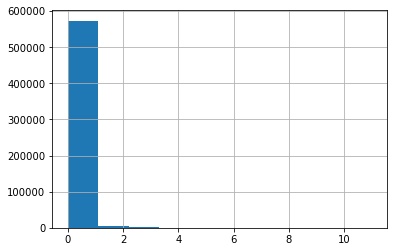

In [18]:
df['bedrooms_to_beds'] = df.bedrooms/df.beds
df.bedrooms_to_beds.hist()

In [19]:
len(df[df['bedrooms_to_beds'] > 1])

7313

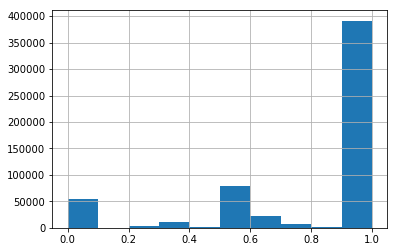

In [20]:
df = df[df['bedrooms_to_beds'] <= 1]
df.bedrooms_to_beds.hist()

### price_clean
remove price > $1,000

(array([ 264101.,  201799.,   64637.,   20884.,    8607.,    4428.,
           2347.,    1668.,    1221.,     722.]),
 array([   0. ,   99.9,  199.8,  299.7,  399.6,  499.5,  599.4,  699.3,
         799.2,  899.1,  999. ]),
 <a list of 10 Patch objects>)

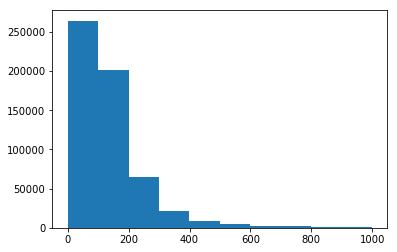

In [21]:
df = df[df['price_clean'] < 1000]
plt.hist(df.price_clean)

### accommodates
remove accommodates > 10

(array([ 353570.,   62949.,  105911.,   27152.,   13164.,    1320.,
           3530.,    1156.,     496.,    1166.]),
 array([  1. ,   2.5,   4. ,   5.5,   7. ,   8.5,  10. ,  11.5,  13. ,
         14.5,  16. ]),
 <a list of 10 Patch objects>)

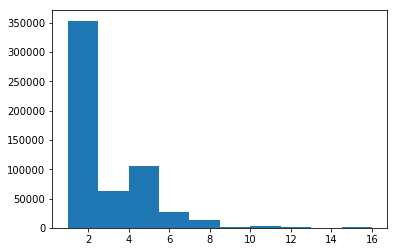

In [22]:
plt.hist(df.accommodates)

(array([  89868.,  263702.,   62949.,   83953.,   21958.,   27152.,
           5511.,    7653.,    1320.,    3077.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

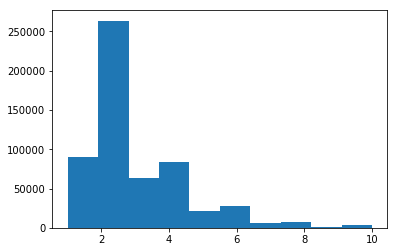

In [23]:
df= df[df['accommodates'] < 11]
plt.hist(df.accommodates)

### property_type
Only choose Apartment, House, Townhouse, Loft, Condominium

In [24]:
df = df[df['property_type'].isin(['Apartment', 'House', 'Townhouse', 'Loft', 'Condominium'])]
df.property_type.value_counts()

Apartment      472475
House           42716
Townhouse       14139
Loft            14102
Condominium      9893
Name: property_type, dtype: int64

### host_since
remove Na's

In [25]:
df.host_since.dropna(axis=0,inplace=True)

In [26]:
sum(df.host_since.isna())

0

### location_exact
only use properties with exact location

In [27]:
df = df[df['is_location_exact'] == 't']

### cleaning_fee
remove cleaning_fee_clean > 550

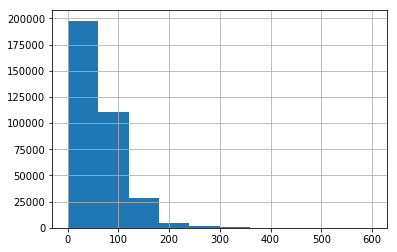

In [28]:
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee_clean'] = df.cleaning_fee.apply(lambda x: formatPrice(x))
df.cleaning_fee_clean.hist()

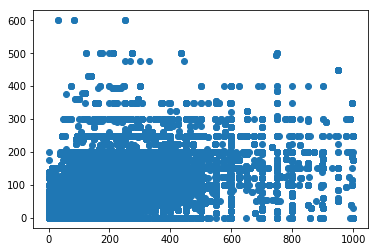

In [229]:
plt.scatter(df.price_clean, df.cleaning_fee_clean)

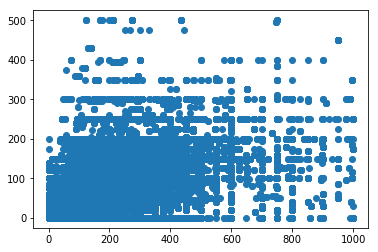

In [29]:
df = df[df['cleaning_fee_clean'] < 550]
plt.scatter(df.price_clean, df.cleaning_fee_clean)

### review_scores_rating
remove <= 50

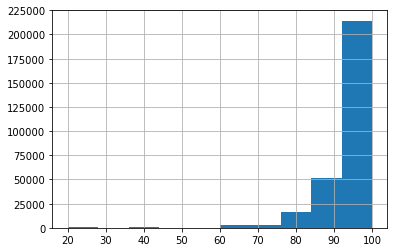

In [34]:
df.review_scores_rating.hist()

In [35]:
df = df[df['review_scores_rating'] > 50]

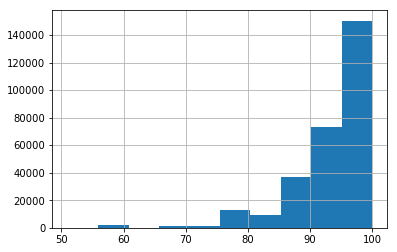

In [36]:
df.review_scores_rating.hist()

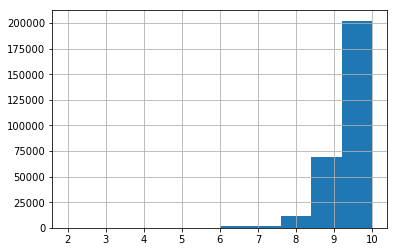

In [38]:
df.review_scores_accuracy.hist()

In [44]:
print('Removed ' + str(num_rows-df.shape[0]) + ' rows')

Removed 294986 rows


## Write data to csv

In [211]:
df.to_csv('airbnbdata_Clean.csv')